In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import cv2
import numpy as np
import time

from utils import visualize, resize_keeping_aspect_ratio
from detector import Detector

In [2]:
MODEL_PATH_1 = '/tf_api/workspace/training/output/output_inference_graph_v3.pb/frozen_inference_graph.pb'
CONVERTED_MODEL = '/experiments/models/converted/ssd_resnet50_v1_fpn_fp16.pb'

IMAGE_PATH = '/home/olysavra/everguard/datasets/PennFudanPed/PennFudanPed/Annotation/converted/images/FudanPed00014.png'


KEEP_ASPECT_RATIO = False
if not KEEP_ASPECT_RATIO:
    WIDTH, HEIGHT = 640, 640

In [3]:
def resize(image):
    if KEEP_ASPECT_RATIO:
        image = resize_keeping_aspect_ratio(
            image, min_dimension=MIN_DIMENSION,
            max_dimension=MAX_DIMENSION
        )
    else:
        image = cv2.resize(image, (WIDTH, HEIGHT), cv2.INTER_NEAREST)
    return image

In [4]:
detector = Detector(MODEL_PATH_1, gpu_memory_fraction=1)

In [5]:
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = resize(image)
print(image.shape)

times = []
for _ in range(1000):
    start = time.perf_counter() 
    result = detector(image, score_threshold=0.5)
    times.append(time.perf_counter() - start)
        
times = np.array(times[10:])
print(times.mean(), times.std())

(640, 640, 3)
1.7705574077636264 2.016896436683304


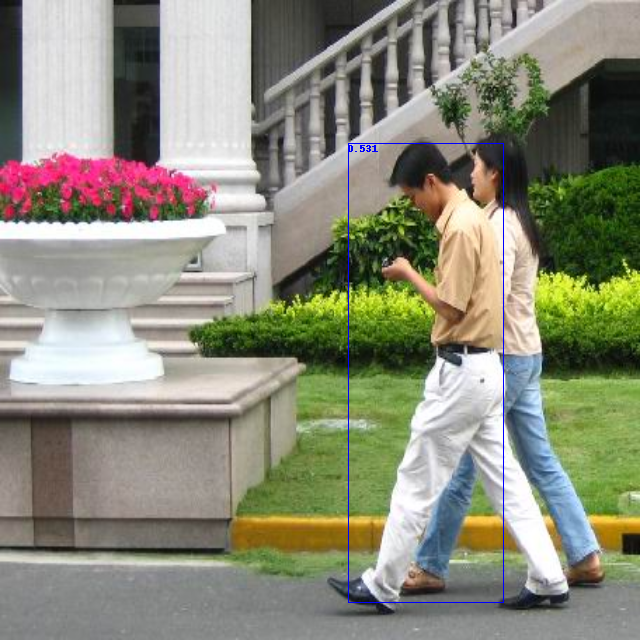

In [6]:
boxes, scores, labels = result
result
visualize(image, boxes, scores, labels)